## Analyze A/B Test Results

*By Rachel Wilson*


## Table of Contents
- [Introduction](#intro)
- [Part I - Descriptive Statistics](#descriptive)
- [Part II - Probability](#probability)
- [Part III - Experimentation](#experimentation)
- [Part IV - Algorithms](#algorithms)


<a id='intro'></a>
### Introduction


<a id='descriptive'></a>
#### Part I - Descriptive Statistics


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(0)

`1.a)`

In [50]:
# Reading in the data into a dataframe
df = pd.read_csv('ab_data.csv')
df.head()

,country,group,converted
0,UK,control,0
1,US,treatment,1
2,UK,treatment,0
3,UK,control,0
4,UK,treatment,0


`b)` Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape

(69889, 3)

`c)` The proportion of users converted.

In [4]:
df['converted'].mean()

0.13047832992316388

`d)` Do any of the rows have missing values?

In [5]:
# Based on the below results, none have missing values.
df.isnull().sum()

country      0
group        0
converted    0
dtype: int64

`e)` How many customers are from each country?

In [6]:
# Number of visitors from each country
df.country.value_counts()

US    48850
UK    17551
CA     3488
Name: country, dtype: int64

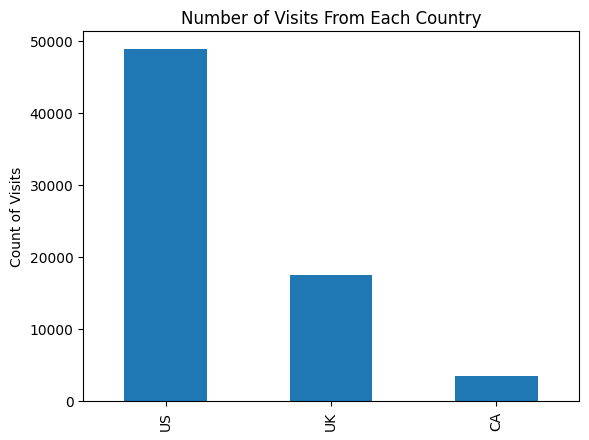

In [7]:
# bar chart of results - this part is done for you
df['country'].value_counts().plot(kind='bar');
plt.title('Number of Visits From Each Country');
plt.ylabel('Count of Visits');
plt.show();

`f)` Recognize that all of your columns are of a **categorical data type** with the exception of one.  Which column is not **categorical**?

In [8]:
# The converted column is not a categorical data type based on the info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69889 entries, 0 to 69888
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    69889 non-null  object
 1   group      69889 non-null  object
 2   converted  69889 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


`g)` What are the possible values of the `converted` column?  Does it make sense that these values are the only possible values? Why or why not? 

In [9]:
# Reflecting the possible values.
df.converted.value_counts()

0    60770
1     9119
Name: converted, dtype: int64

**It makes sense that these are the only possible values because it is a Boolean type of answer. As in "Did they convert or did they not convert?"**

<a id='probability'></a>
#### Part II - Probability

`1.` 

`a)` What is the probability of an individual converting regardless of the page they receive or the country they are from? Simply, what is the chance of conversion in the dataset?

In [10]:
# Based on the below, the probability is 13.05%
df['converted'].mean()

0.13047832992316388

`b)` Given that an individual was in the `control` group, what is the probability they converted?

In [11]:
# Based on the below, the probability is 10.52%
df.query('group == "control"')['converted'].mean()

0.1052540515600669

`c)` Given that an individual was in the `treatment` group, what is the probability they converted?

In [12]:
# Based on the below, the probability is 15.53%
df.query('group == "treatment"')['converted'].mean()

0.15532078043793132

In [52]:
# Calculating the difference in rates
df.query('group == "control"')['converted'].mean() - df.query('group == "treatment"')['converted'].mean()

-0.050066728877864425

`d)` Do you see evidence that the treatment is related to higher `converted` rates?

**Yes, based on the higher probability of the treatment group.**

`e)` What is the probability that an individual was in the `treatment`?

In [51]:
# Based on the below, the probability is 50.38%
df[df['group'] == 'treatment'].count()/df.count()

country      0.503813
group        0.503813
converted    0.503813
dtype: float64

`f)` What is the probability that an individual was from Canada `CA`?

In [14]:
# Based on the below, the probability is 12.53%
df.query('country == "CA"')['converted'].mean()

0.1252866972477064

`g)` Given that an individual was in the `US`, what was the probability that they `converted`?

$P(\text{converted} == 1|\text{country} ==\text{"US"})$



In [15]:
# Based on the below, the probability is 13.28%
df.query('country == "US"')['converted'].mean()

0.13277379733879222

`h)` Given that an individual was in the `UK`, what was the probability that they `converted`? 

$P(\text{converted} == 1|\text{country} ==\text{"UK"})$

In [16]:
# Based on the below, the probability is 12.51%
df.query('country == "UK"')['converted'].mean()

0.12512107572218106

`i)` Do you see evidence that the `converted` rate might differ from one country to the next?

**Yes, but only a small change. Not a significant statistical change.**

`j)` Consider the table below, fill in the conversion rates below to look at how conversion by country and treatment group vary.

In [17]:
# Method 1  - explicitly calculate each probability
print(df.query('country == "US" and group == "control" and converted == 1').shape[0]/df.query('country == "US" and group == "control"').shape[0]) 
print(df.query('country == "US" and group == "treatment" and converted == 1').shape[0]/df.query('country == "US" and group == "treatment"').shape[0])

0.10731404958677686
0.1577687626774848


In [18]:
# Method 2 - quickly calculate using `groupby`
df.query('country == "US"').groupby('group')['converted'].mean()

group
control      0.107314
treatment    0.157769
Name: converted, dtype: float64

##### Completed Table

|             | US          | UK          | CA          |
| ----------- | ----------- | ----------- | ----------- |
| Control     | 10.7%       |  10.2%          |  9.4%          |
| Treatment   | 15.8%       |  14.9%          |  15.4%          |

In [19]:
# Calculating the probability for the UK group
df.query('country == "UK"').groupby('group')['converted'].mean()

group
control      0.101649
treatment    0.148698
Name: converted, dtype: float64

In [20]:
# Calculating the probability for the CA group
df.query('country == "CA"').groupby('group')['converted'].mean()

group
control      0.094474
treatment    0.154017
Name: converted, dtype: float64

<a id='experimentation'></a>
### Part III - Experimentation

`1.`

`a)` The **convert rate** for $p_{treatment}$ under the null.  The **convert rate** for $p_{control}$ under the null. The sample size for the `control` and the sample size for the `treatment` are from the original dataset.

In [21]:
# Convert rates and sample sizes calculated.
p_control_treatment_null = df['converted'].mean()
n_treatment = df.query('group == "treatment"').shape[0]
n_control = df.query('group == "control"').shape[0]

print(n_treatment, n_control)
print(p_control_treatment_null)

35211 34678
0.13047832992316388


`b)` Use the results from part `a)` to simulate `n_treatment` transactions with a convert rate of `p_treatment_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **treatment_converted**.

In [22]:
# Creating the sample, then pulling the data, then putting it into a list.
treatment_converted = []

tsam = df.sample(n_treatment)
T = tsam.sample(frac=p_control_treatment_null, replace=True)
treatment_converted = T['converted'].values.tolist()  

`c)` Use the results from part `a)` to simulate `n_control` transactions with a convert rate of `p_control_null`.  Store these $n_{treatment}$ 1's and 0's in a `list` of **control_converted**.

In [23]:
# Creating the sample, then pulling the data, then putting it into a list.
control_converted = []

csam = df.sample(n_control)
C = csam.sample(frac=p_control_treatment_null, replace=True)
control_converted = C['converted'].values.tolist()

`d)` Find the estimate for $p_{treatment}$ - $p_{control}$ under the null using the simulated values from part `(b)` and `(c)`.

In [24]:
# Estimate under the null calculated
np.mean(treatment_converted) - np.mean(control_converted)

-0.003428974136334445

`e)` Simulate 500 $p_{treatment}$ - $p_{control}$ values using this same process as `b)`- `d)` similarly to the one you calculated in parts **a. through g.** above.  Store all 500 values in an numpy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(500):
    # simulate the treatment and control converted arrays

    #treatment
    tsam = df.sample(n_treatment)
    T = tsam.sample(frac=p_control_treatment_null, replace=True)
    treatment_converted = T['converted'].values.tolist()
    
    #control
    csam = df.sample(n_control)
    C = csam.sample(frac=p_control_treatment_null, replace=True)
    control_converted = C['converted'].values.tolist()

    # calculate p_treatment and p_control under the null
    p_treatment = np.std(treatment_converted)
    p_control = np.std(control_converted)

    # calculate the difference between p_treatment_null and p_control_null
    p_diff = p_treatment - p_control

    # add p_diff to the p_diffs array
    p_diffs.append(p_diff)

`f)` Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?

<AxesSubplot: >

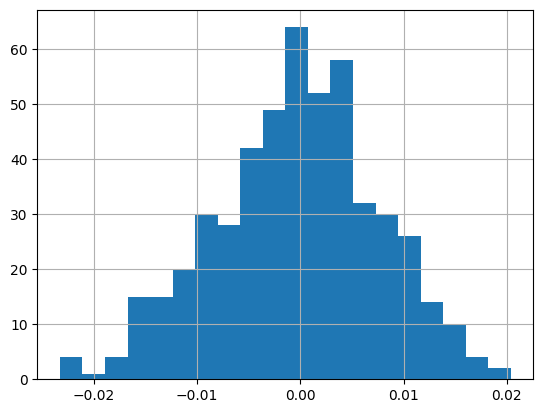

In [26]:
# The plot looks like I would expect. It is normally distributed.
p_diffs = pd.Series(p_diffs)
p_diffs.hist(bins=20)

`g)` What proportion of the **p_diffs** are greater than the difference observed between `treatment` and `control` in `df`?

In [27]:
# The proportion is calculated below
p_diffs.mean()

-0.0002955972878732142

`h)` In words, explain what you just computed in part `g)`  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages using our Type I error rate of 0.05?

**This is the p-value that has been calculated. The p-value is the probability of observing the statistic if the null hypothesis is true. So this is the rate of accuracy if we assume that the control and treatment groups do not affect conversations.**

<a id='algorithms'></a>
### Part IV - Algorithms

`1.`

`a)` Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We can use logistic regression in this case, since we're dealing with more binary yes/no values.



`b)` You first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# Creating intercept, getting dummies.
df['intercept'] = 1
df['ab_page'] = pd.get_dummies(df['group'])['treatment']
df.head()

,country,group,converted,intercept,ab_page
0,UK,control,0,1,0
1,US,treatment,1,1,1
2,UK,treatment,0,1,1
3,UK,control,0,1,0
4,UK,treatment,0,1,1


`c)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is a difference in `treatment` vs. `control`.

In [35]:
# X and y matrix defined
X = df[['intercept', 'ab_page']]
y = df['converted']

`d)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `c)`.

In [36]:
import statsmodels.api as sm

# Logit Model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.384516
         Iterations 6


`e)` Provide the summary of your model below.

In [31]:
# Summary is printed
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69887
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:                0.007175
Time:                        17:26:03   Log-Likelihood:                -26873.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                 1.810e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.1402      0.017   -122.305      0.000      -2.174      -2.106
ab_page        0.4467      0.023     19.539      0.000       0.402       0.492


`f)` What is the p-value associated with **ab_page**? Does it lead you to the same conclusion you drew in the **Experiment** section.

The p-value associated is 0. It leads me to the same conclusion I was able to draw in the Experiment section.

`2. a)` Now you will want to create two new columns as dummy variables for `US` and `UK`.  Again, use `get_dummies` to add these columns.  The dataframe you create should include at least the following columns (If both columns for `US` and `UK` are `0` this represents `CA`. 

In [39]:
# Creating intercept, getting dummies.

df['intercept'] = 1

df[['US', 'UK', 'CA']] = pd.get_dummies(df['country'])

df = df.drop('CA', axis=1)

df.head()

,country,group,converted,intercept,ab_page,US,UK
0,UK,control,0,1,0,0,1
1,US,treatment,1,1,1,0,0
2,UK,treatment,0,1,1,0,1
3,UK,control,0,1,0,0,1
4,UK,treatment,0,1,1,0,1


`b)`  Create your `X` matrix and `y` response column that will be passed to your model, where you are testing if there is 
* a difference in `converted` between `treatment` vs. `control`
* a difference in `converted` between `US`, `UK`, and `CA`

In [43]:
# X and y matrix defined
X = df[['intercept', 'US', 'UK']]
y = df['converted']

`c)` Use **statsmodels** to import and fit your regression model on the `X` and `y` from part `b)`.

In [44]:
# Importing and fitting the model
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.387241
         Iterations 6


`d)` Provide the summary of your model below.

In [45]:
# Printing the summary
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:                69889
Model:                          Logit   Df Residuals:                    69886
Method:                           MLE   Df Model:                            2
Date:                Thu, 25 Apr 2024   Pseudo R-squ.:               0.0001402
Time:                        17:53:48   Log-Likelihood:                -27064.
converged:                       True   LL-Null:                       -27068.
Covariance Type:            nonrobust   LLR p-value:                   0.02250
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.8767      0.013   -140.747      0.000      -1.903      -1.851
US            -0.0666      0.053     -1.261      0.207      -0.170       0.037
UK            -0.0682      0.026     -2.579      0.0

`e)` What do the `p-values` associated with `US` and `UK` suggest in relation to how they impact `converted`? 

**The country is statistically significant in predicting the rate of converted.**